<a href="https://www.kaggle.com/code/himanshunakrani/rag-retrieval-augmented-generation-with-langchain?scriptVersionId=215954203" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Retrieval augmented generation
 
In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution. 

This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc). 

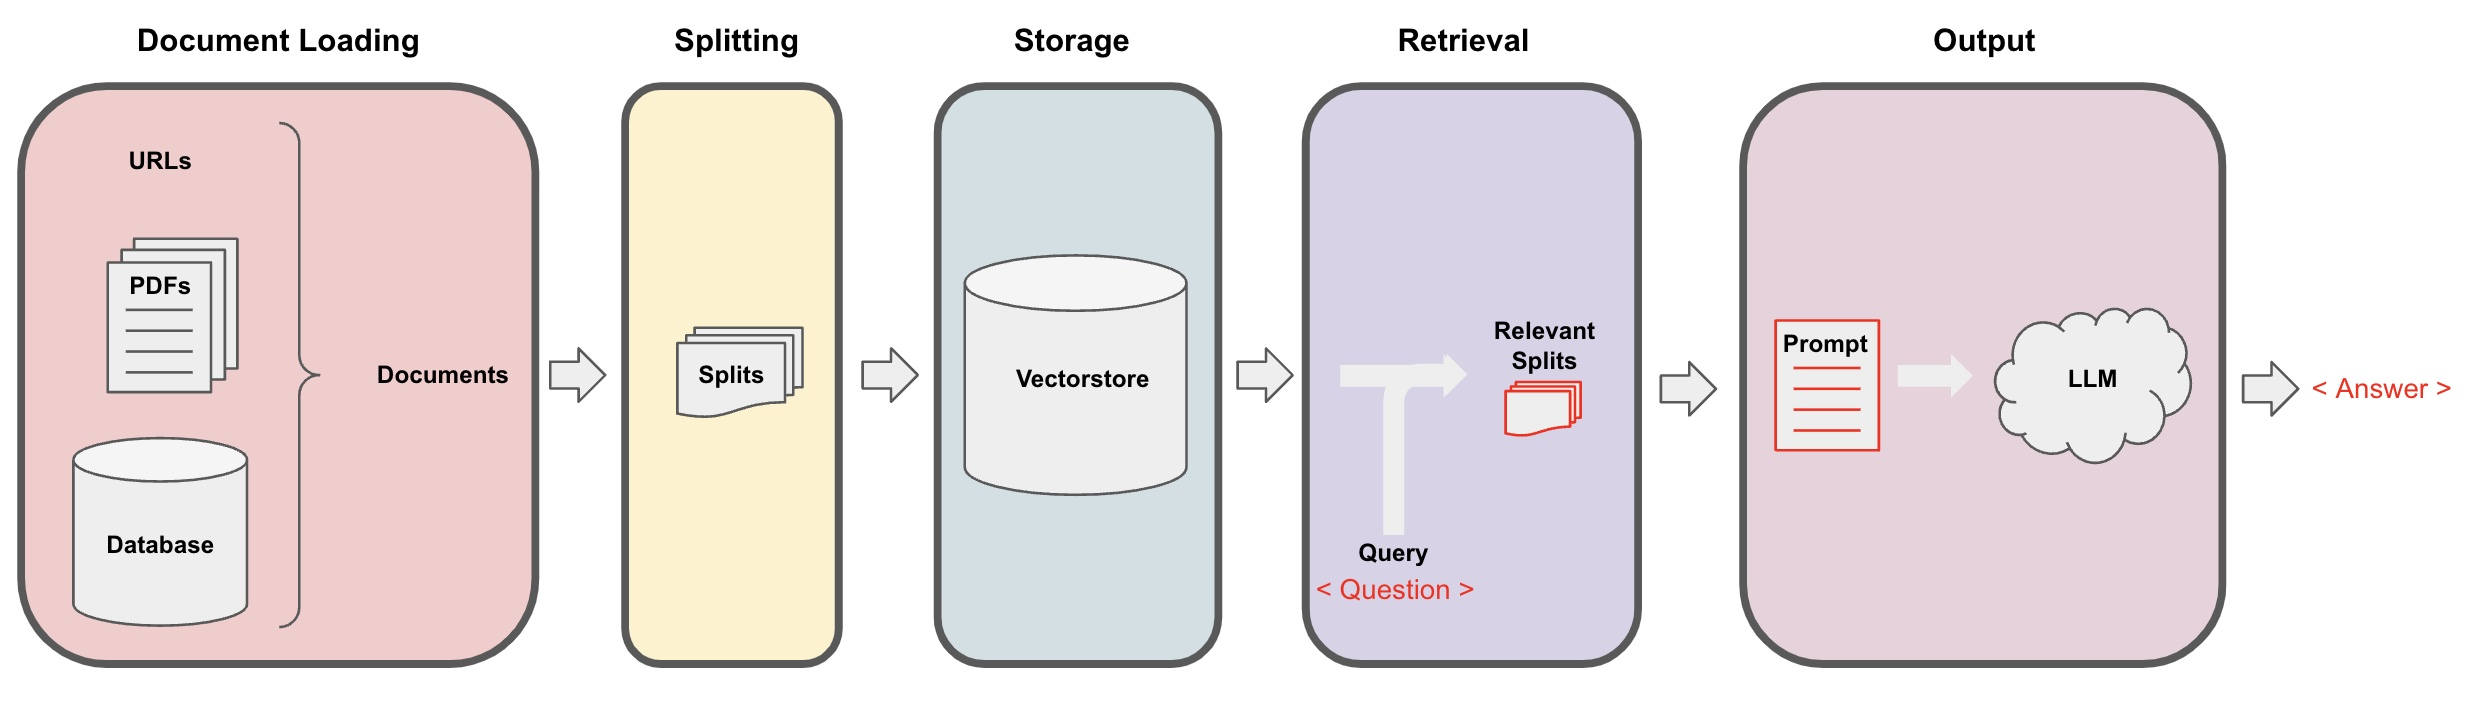

## Document Loading

In [1]:
! pip install langchain openai pypdf langchain-community pydub yt_dlp chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.3/454.3 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.6 MB/s eta 0:

In [2]:
import os
import openai
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()

os.environ["OPENAI_API_KEY"]   = user_secrets.get_secret("OPENAI_API_KEY")

### PDFs

Let's load a PDF [transcript](https://see.stanford.edu/materials/aimlcs229/transcripts/MachineLearning-Lecture01.pdf) from Andrew Ng's famous CS229 course!

In [3]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture01.pdf")
pages = loader.load()

Each page is a `Document`.

A `Document` contains text (`page_content`) and `metadata`.

In [4]:
len(pages)

22

In [5]:
page = pages[0]

In [6]:
print(page.page_content[0:500])

MachineLearning-Lecture01  
Instructor (Andrew Ng): Okay. Good morning. Welcome to CS229, the machine 
learning class. So what I wanna do today is just spend a little time going over the logistics 
of the class, and then we'll start to talk a bit about machine learning.  
By way of introduction, my name's Andrew Ng and I'll be instructor for this class. And so 
I personally work in machine learning, and I've worked on it for about 15 years now, and 
I actually think that machine learning is the 


In [7]:
page.metadata

{'source': '/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture01.pdf',
 'page': 0}

### YouTube

In [8]:
from langchain.document_loaders.generic import GenericLoader
from langchain_community.document_loaders.blob_loaders.file_system import FileSystemBlobLoader

from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [9]:
# ! pip install yt_dlp
# ! pip install pydub

In [10]:
# url="https://www.youtube.com/watch?v=jGwO_UgTS7I"
# save_dir="/kaggle/working/"
# loader = GenericLoader(
#     YoutubeAudioLoader([url],save_dir),  # fetch from youtube
#     # FileSystemBlobLoader(save_dir, glob="*.m4a"),   #fetch locally
#     OpenAIWhisperParser()
# )
# docs = loader.load()

In [11]:
# docs[0].page_content[0:500]

### URLs

In [12]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://github.com/basecamp/handbook/blob/master/titles-for-programmers.md")

In [13]:
docs = loader.load()

In [14]:
print(docs[0].page_content[:500])





















































































handbook/titles-for-programmers.md at master · basecamp/handbook · GitHub













































Skip to content













Navigation Menu

Toggle navigation




 













            Sign in
          








        Product
        













GitHub Copilot
        Write better code with AI
      







Security
        Find and fix vulnerabilities
      







Actions
      


## Document Splitting

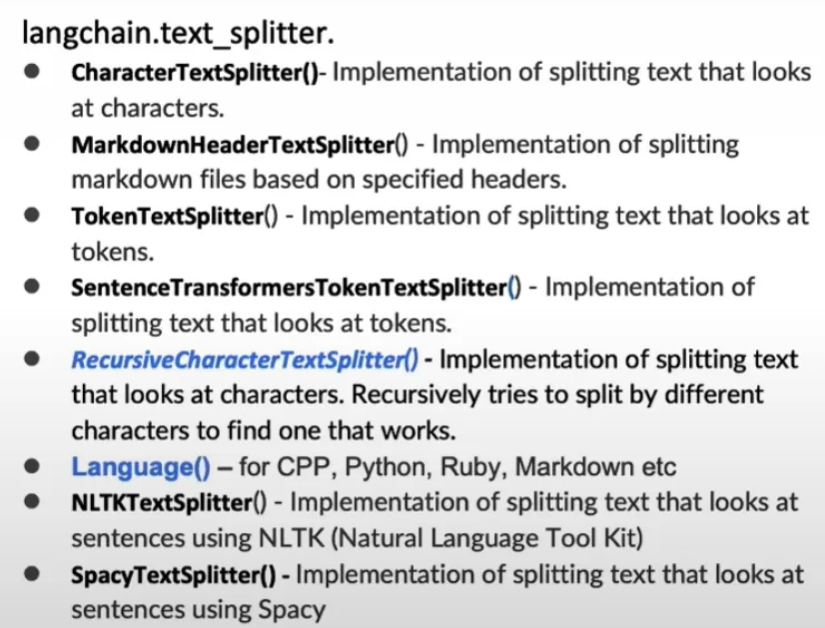
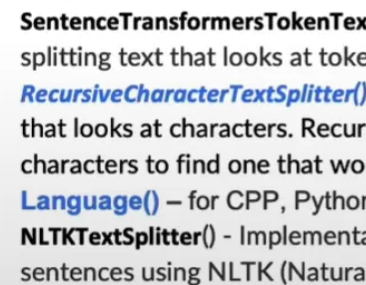

In [15]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [16]:
chunk_size =26
chunk_overlap = 4

In [17]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

In [18]:
text1 = 'abcdefghijklmnopqrstuvwxyz'

In [19]:
r_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz']

In [20]:
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefg'

In [21]:
r_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyz', 'wxyzabcdefg']

In [22]:
c_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyzabcdefg']

In [23]:
text3 = "a b c d e f g h i j k l m n o p q r s t u v w x y z"

In [24]:
r_splitter.split_text(text3) 

['a b c d e f g h i j k l m', 'l m n o p q r s t u v w x', 'w x y z']

In [25]:
c_splitter.split_text(text3)

['a b c d e f g h i j k l m n o p q r s t u v w x y z']

In [26]:
c_splitter = CharacterTextSplitter(
    chunk_size=20,
    chunk_overlap=5,
    separator = ' '
)
c_splitter.split_text(text3)

['a b c d e f g h i j',
 'h i j k l m n o p q',
 'o p q r s t u v w x',
 'v w x y z']

`RecursiveCharacterTextSplitter` is recommended for generic text. 

In [27]:
some_text = """When writing documents, writers will use document structure to group content. \
This can convey to the reader, which idea's are related. For example, closely related ideas \
are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n  \
Paragraphs are often delimited with a carriage return or two carriage returns. \
Carriage returns are the "backslash n" you see embedded in this string. \
Sentences have a period at the end, but also, have a space.\
and words are separated by space."""

In [28]:
len(some_text)

496

In [29]:
c_splitter = CharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0,
    separator = ' '
)
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0, 
    separators=["\n\n", "\n", " ", ""]
)

In [30]:
c_splitter.split_text(some_text)

['When writing documents, writers will use document structure to group content. This can convey to the reader, which idea\'s are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also,',
 'have a space.and words are separated by space.']

In [31]:
r_splitter.split_text(some_text)

["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.",
 'Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also, have a space.and words are separated by space.']

Let's reduce the chunk size a bit and add a period to our separators:

In [32]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", "\. ", " ", ""]
)
r_splitter.split_text(some_text)

["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example,",
 'closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.',
 'Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this',
 'string. Sentences have a period at the end, but also, have a space.and words are separated by space.']

In [33]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", "(?<=\. )", " ", ""]
)
r_splitter.split_text(some_text)

["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example,",
 'closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.',
 'Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this',
 'string. Sentences have a period at the end, but also, have a space.and words are separated by space.']

In [34]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture01.pdf")
pages = loader.load()

In [35]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=1000,
    chunk_overlap=150,
    length_function=len
)

In [36]:
docs = text_splitter.split_documents(pages)

In [37]:
docs[0].page_content

"MachineLearning-Lecture01  \nInstructor (Andrew Ng): Okay. Good morning. Welcome to CS229, the machine \nlearning class. So what I wanna do today is just spend a little time going over the logistics \nof the class, and then we'll start to talk a bit about machine learning.  \nBy way of introduction, my name's Andrew Ng and I'll be instructor for this class. And so \nI personally work in machine learning, and I've worked on it for about 15 years now, and \nI actually think that machine learning is the most exciting field of all the computer \nsciences. So I'm actually always excited about teaching this class. Sometimes I actually \nthink that machine learning is not only the most exciting thing in computer science, but \nthe most exciting thing in all of human endeavor, so maybe a little bias there.  \nI also want to introduce the TAs, who are all graduate students doing research in or \nrelated to the machine learning and all aspects of machine learning. Paul Baumstarck"

In [38]:
len(docs)

78

In [39]:
len(pages)

22

### Token splitting

We can also split on token count explicity, if we want.

This can be useful because LLMs often have context windows designated in tokens.

Tokens are often ~4 characters.

In [40]:
from langchain.text_splitter import TokenTextSplitter

In [41]:
text_splitter = TokenTextSplitter(chunk_size=1, chunk_overlap=0)

In [42]:
text1 = "foo bar bazzyfoo"

In [43]:
text_splitter.split_text(text1)

['foo', ' bar', ' b', 'az', 'zy', 'foo']

In [44]:
text_splitter = TokenTextSplitter(chunk_size=10, chunk_overlap=0)

In [45]:
docs = text_splitter.split_documents(pages)

In [46]:
docs[0]

Document(metadata={'source': '/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture01.pdf', 'page': 0}, page_content='MachineLearning-Lecture01  \n')

In [47]:
pages[0].metadata

{'source': '/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture01.pdf',
 'page': 0}

### Context aware splitting

Chunking aims to keep text with common context together.

A text splitting often uses sentences or other delimiters to keep related text together but many documents (such as Markdown) have structure (headers) that can be explicitly used in splitting.

We can use `MarkdownHeaderTextSplitter` to preserve header metadata in our chunks, as show below.

In [48]:
from langchain.text_splitter import MarkdownHeaderTextSplitter

In [49]:
markdown_document = """# Title\n\n \
## Chapter 1\n\n \
Hi this is Jim\n\n Hi this is Joe\n\n \
### Section \n\n \
Hi this is Lance \n\n 
## Chapter 2\n\n \
Hi this is Molly"""

In [50]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

In [51]:
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)
md_header_splits = markdown_splitter.split_text(markdown_document)

In [52]:
md_header_splits[0]

Document(metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1'}, page_content='Hi this is Jim  \nHi this is Joe')

In [53]:
md_header_splits[1]

Document(metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1', 'Header 3': 'Section'}, page_content='Hi this is Lance')

## Vectorstores and Embeddings

In [54]:
from langchain.document_loaders import PyPDFLoader

# Load PDF
loaders = [
    # Duplicate documents on purpose - messy data
    PyPDFLoader("/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture01.pdf"),
    PyPDFLoader("/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture01.pdf"),
    PyPDFLoader("/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture02.pdf"),
    PyPDFLoader("/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture03.pdf")
]
docs = []
for loader in loaders:
    docs.extend(loader.load())

In [55]:
# Split
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 150
)

In [56]:
splits = text_splitter.split_documents(docs)

In [57]:
len(splits)

208

### Embeddings

In [58]:
from langchain.embeddings.openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings()

<ipython-input-58-ca2f04320657>:2: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embedding = OpenAIEmbeddings()


In [59]:
sentence1 = "i like dogs"
sentence2 = "i like canines"
sentence3 = "the weather is ugly outside"

In [60]:
embedding1 = embedding.embed_query(sentence1)
embedding2 = embedding.embed_query(sentence2)
embedding3 = embedding.embed_query(sentence3)

In [61]:
import numpy as np

In [62]:
np.dot(embedding1, embedding2)

0.9631510802407719

In [63]:
np.dot(embedding2, embedding3)

0.7590539714454778

In [64]:
np.dot(embedding1, embedding3)

0.7702031204123156

### Vectorstores

In [65]:
from langchain.vectorstores import Chroma

In [66]:
persist_directory = '/kaggle/working/chroma/'

In [67]:
!rm -rf ./kaggle/working/chroma  # remove old database files if any

In [68]:
vectordb = Chroma.from_documents(
    documents=splits,
    embedding=embedding,
    persist_directory=persist_directory
)

In [69]:
print(vectordb._collection.count())

208


### Similarity Search

In [70]:
question = "is there an email i can ask for help"

In [71]:
docs = vectordb.similarity_search(question,k=3)

In [72]:
len(docs)

3

In [73]:
docs[0].page_content

"cs229-qa@cs.stanford.edu. This goes to an account that's read by all the TAs and me. So \nrather than sending us email individually, if you send email to this account, it will \nactually let us get back to you maximally quickly with answers to your questions.  \nIf you're asking questions about homework problems, please say in the subject line which \nassignment and which question the email refers to, since that will also help us to route \nyour question to the appropriate TA or to me appropriately and get the response back to \nyou quickly.  \nLet's see. Skipping ahead — let's see — for homework, one midterm, one open and term \nproject. Notice on the honor code. So one thing that I think will help you to succeed and \ndo well in this class and even help you to enjoy this class more is if you form a study \ngroup.  \nSo start looking around where you're sitting now or at the end of class today, mingle a \nlittle bit and get to know your classmates. I strongly encourage you to form st

## Failure modes

This seems great, and basic similarity search will get you 80% of the way there very easily. 

But there are some failure modes that can creep up. 

Here are some edge cases that can arise 

In [74]:
question = "what did they say about matlab?"

In [75]:
docs = vectordb.similarity_search(question,k=5)

In [76]:
docs[0]

Document(metadata={'page': 8, 'source': '/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture01.pdf'}, page_content='those homeworks will be done in either MATLAB or in Octave, which is sort of — I \nknow some people call it a free version of MATLAB, which it sort of is, sort of isn\'t.  \nSo I guess for those of you that haven\'t seen MATLAB before, and I know most of you \nhave, MATLAB is I guess part of the programming language that makes it very easy to \nwrite codes using matrices, to write code for numerical routines, to move data around, to \nplot data. And it\'s sort of an extremely easy to learn tool to use for implementing a lot of \nlearning algorithms.  \nAnd in case some of you want to work on your own home computer or something if you \ndon\'t have a MATLAB license, for the purposes of this class, there\'s also — [inaudible] \nwrite that down [inaudible] MATLAB — there\' s also a software package called Octave \nthat you can download for free off the I

In [77]:
docs[1]

Document(metadata={'page': 8, 'source': '/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture01.pdf'}, page_content='those homeworks will be done in either MATLAB or in Octave, which is sort of — I \nknow some people call it a free version of MATLAB, which it sort of is, sort of isn\'t.  \nSo I guess for those of you that haven\'t seen MATLAB before, and I know most of you \nhave, MATLAB is I guess part of the programming language that makes it very easy to \nwrite codes using matrices, to write code for numerical routines, to move data around, to \nplot data. And it\'s sort of an extremely easy to learn tool to use for implementing a lot of \nlearning algorithms.  \nAnd in case some of you want to work on your own home computer or something if you \ndon\'t have a MATLAB license, for the purposes of this class, there\'s also — [inaudible] \nwrite that down [inaudible] MATLAB — there\' s also a software package called Octave \nthat you can download for free off the I

Notice that we're getting duplicate chunks (because of the duplicate `MachineLearning-Lecture01.pdf` in the index).

Semantic search fetches all similar documents, but does not enforce diversity.

`docs[0]` and `docs[1]` are indentical.

In [78]:
question = "what did they say about regression in the third lecture?"

In [79]:
docs = vectordb.similarity_search(question,k=5)

In [80]:
for doc in docs:
    print(doc.metadata)

{'page': 0, 'source': '/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture03.pdf'}
{'page': 2, 'source': '/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture02.pdf'}
{'page': 17, 'source': '/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture02.pdf'}
{'page': 8, 'source': '/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture01.pdf'}
{'page': 8, 'source': '/kaggle/input/rag-with-langchain-deeplearning-ai/MachineLearning-Lecture01.pdf'}


In [81]:
print(docs[4].page_content)

into his office and he said, "Oh, professor, professor, thank you so much for your 
machine learning class. I learned so much from it. There's this stuff that I learned in your 
class, and I now use every day. And it's helped me make lots of money, and here's a 
picture of my big house."  
So my friend was very excited. He said, "Wow. That's great. I'm glad to hear this 
machine learning stuff was actually useful. So what was it that you learned? Was it 
logistic regression? Was it the PCA? Was it the data networks? What was it that you 
learned that was so helpful?" And the student said, "Oh, it was the MATLAB."  
So for those of you that don't know MATLAB yet, I hope you do learn it. It's not hard, 
and we'll actually have a short MATLAB tutorial in one of the discussion sections for 
those of you that don't know it.  
Okay. The very last piece of logistical thing is the discussion sections. So discussion 
sections will be taught by the TAs, and attendance at discussion sections is o

## Retrieval